### 목표 : 생선 품종 분류 모델

-   데이터 : 2가지 품종의 생선 데이터 fish.csv
-   피쳐 : Weight, Length
-   타겟 : Species
-   유형 : 지도학습/분류


(1) 모듈 로딩 & 데이터 준비


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data_file = "../data/fish.csv"


In [3]:
fishDF = pd.read_csv(data_file, usecols=[0, 1, 2])
fishDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [4]:
# Bream, Smelt 품종 행만 추출
mask = fishDF.Species.isin(["Bream", "Smelt"])

# 해당 행만 도출
twoFishDF = fishDF[mask]
twoFishDF.info()

twoFishDF.reset_index(drop=True, inplace=True)
twoFishDF


<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [5]:
twoFishDF.Species = twoFishDF.Species.replace({"Bream": 0, "Smelt": 1}).copy()


C:\Users\KDP-25\AppData\Local\Temp\ipykernel_14756\1270565607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoFishDF.Species = twoFishDF.Species.replace({"Bream": 0, "Smelt": 1}).copy()


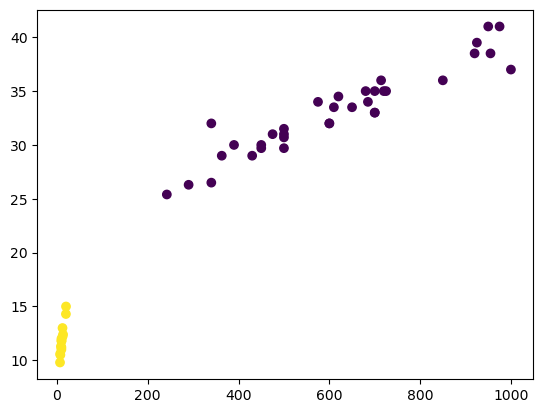

In [6]:
plt.scatter(x=twoFishDF.Weight, y=twoFishDF.Length, c=twoFishDF.Species)


(3) 기계학습을 위한 데이터 준비

-   피쳐/특성 + 타겟/라벨/클래스
-   학습용 데이터셋 : 75%
-   테스트용 데이터셋 : 25%


(3-1) 직접 타겟/라벨 컬럼의 비율을 고려해서 학습&테스트용 데이터셋 준비


In [7]:
# 데이터 섞기 => 100% 모두 섞기
twoFishDF = twoFishDF.sample(frac=1)

print(twoFishDF.shape)
twoFishDF


(49, 3)


,Species,Weight,Length
17,0,700.0,33.0
45,1,13.4,12.4
8,0,450.0,30.0
41,1,10.0,11.8
23,0,680.0,35.0
12,0,500.0,31.5
16,0,700.0,33.0
9,0,500.0,30.7
32,0,925.0,39.5
26,0,720.0,35.0


In [8]:
# 학습과 테스트 비율 조절 갯수 계산
num = round(twoFishDF.shape[0] * 0.8)

# 학습 데이터셋 추출
trainDF = twoFishDF.iloc[: num + 1]
print(f"trainDF => {trainDF.shape}\n{trainDF.tail(3)}")

# 테스트 데이터셋 추출
testDF = twoFishDF.iloc[num + 1 :]
print(f"\ntestDF => {testDF.shape}\n{testDF.tail(3)}")


trainDF => (40, 3)
    Species  Weight  Length
33        0   975.0    41.0
5         0   450.0    29.7
13        0   340.0    32.0

testDF => (9, 3)
    Species  Weight  Length
34        0   950.0    41.0
14        0   600.0    32.0
42        1     9.9    11.8


In [9]:
featureDF = twoFishDF[twoFishDF.columns[1:]]
targetDF = twoFishDF.Species

print(f"featureDF => {featureDF.shape}\n{featureDF.head(2)}")
print(f"targetDF => {targetDF.shape}\n{targetDF.head(2)}")


featureDF => (49, 2)
    Weight  Length
17   700.0    33.0
45    13.4    12.4
targetDF => (49,)
17    0
45    1
Name: Species, dtype: int64


(3-2) scikit-learn 모듈 활용한 학습&테스트용 데이터셋 준비

-   추가 모듈 로딩


In [10]:
from sklearn.model_selection import train_test_split


In [11]:
## -- 비율 설정 없이 학습/테스트셋 분리
## -- [기본] shuffle = True, train:test = 0.75:0.25
## -- [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetDF)


In [12]:
print(f"x_train : {x_train.shape}, y_train : {y_train.shape}")
print(x_train.head(2), y_train.head(2), sep="\n")

print(f"x_test : {x_test.shape}, y_test : {y_test.shape}")
print(x_test.head(2), y_test.head(2), sep="\n")


x_train : (36, 2), y_train : (36,)
   Weight  Length
5   450.0    29.7
6   500.0    29.7
5    0
6    0
Name: Species, dtype: int64
x_test : (13, 2), y_test : (13,)
    Weight  Length
8    450.0    30.0
12   500.0    31.5
8     0
12    0
Name: Species, dtype: int64


In [13]:
## -- 비율 설정 없이 학습/테스트셋 분리
## -- [기본] shuffle = True
## -- [설정] train:test = 0.9:0.1 => test_size, train_size 매개변수 값 설정
## -- [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.1)


In [14]:
print(f"x_train : {x_train.shape}, y_train : {y_train.shape}")
print(x_train.head(2), y_train.head(2), sep="\n")

print(f"x_test : {x_test.shape}, y_test : {y_test.shape}")
print(x_test.head(2), y_test.head(2), sep="\n")


x_train : (44, 2), y_train : (44,)
    Weight  Length
39     9.8    11.2
9    500.0    30.7
39    1
9     0
Name: Species, dtype: int64
x_test : (5, 2), y_test : (5,)
    Weight  Length
34   950.0    41.0
32   925.0    39.5
34    0
32    0
Name: Species, dtype: int64


In [19]:
## -- 비율 설정 없이 학습/테스트셋 분리
## -- [기본] shuffle = True
## -- [설정] train:test = 0.9:0.1 => test_size, train_size 매개변수 값 설정
## --        분류할 target이 불균형일 경우 비율 지정하는 stratify 매개변수를 target으로 설정
## -- [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
x_train, x_test, y_train, y_test = train_test_split(
    featureDF, targetDF, test_size=0.1, stratify=targetDF
)


In [20]:
print(f"x_train : {x_train.shape}, y_train : {y_train.shape}")
print(x_train.head(2), y_train.head(2), sep="\n")

print(f"x_test : {x_test.shape}, y_test : {y_test.shape}")
print(x_test.head(2), y_test.head(2), sep="\n")


x_train : (44, 2), y_train : (44,)
    Weight  Length
29  1000.0    37.0
21   685.0    34.0
29    0
21    0
Name: Species, dtype: int64
x_test : (5, 2), y_test : (5,)
    Weight  Length
41    10.0    11.8
4    430.0    29.0
41    1
4     0
Name: Species, dtype: int64


In [22]:
### 검증용 데이터셋 준비 - 학습용 데이터셋에서 분리
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, stratify=y_train
)


In [24]:
print(f"x_train : {x_train.shape}, y_train : {y_train.shape}")
# print(x_train.head(2), y_train.head(2), sep="\n")

print(f"x_val : {x_val.shape}, y_val : {y_val.shape}")
# print(x_val.head(2), y_val.head(2), sep="\n")

print(f"x_test : {x_test.shape}, y_test : {y_test.shape}")
# print(x_test.head(2), y_test.head(2), sep="\n")


x_train : (39, 2), y_train : (39,)
x_val : (5, 2), y_val : (5,)
x_test : (5, 2), y_test : (5,)


(4) 학습 진행

-   학습 방법 : 지도학습/분류 => KNN
-   모델 인스턴스 생성 => fit()


In [25]:
model = KNeighborsClassifier()
model


KNeighborsClassifier()

In [26]:
# 학습 진행 => 학습용 데이터 진행
model.fit(x_train, y_train)


KNeighborsClassifier()

(5) 테스트 진행 = 학습에 사용되지 않는 데이터로 진행


In [27]:
model.score(x_val, y_val)


1.0

(6) 모델 활용 예측 => 새로운 데이터로 진행


In [28]:
model.predict(x_test)


array([1, 0, 0, 0, 0], dtype=int64)

In [29]:
y_test


41    1
4     0
26    0
23    0
27    0
Name: Species, dtype: int64